# [[13,1,3]] surface code

The code itself as well as all the approaches to encoding, decoding, error correction and logical operations are taken from the paper:

Joschka Roffe, Quantum Error Correction: An Introductory Guide, arXiv:1907.11157 (2019)

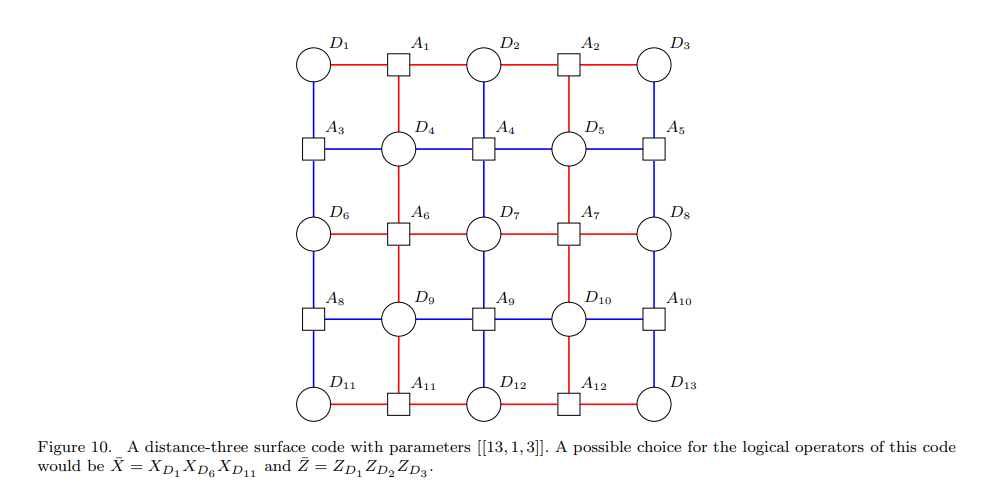

Not only the syndrome extraction is studied here but also encoding, logical qubit operations, decoding and error correction.

## Encoding

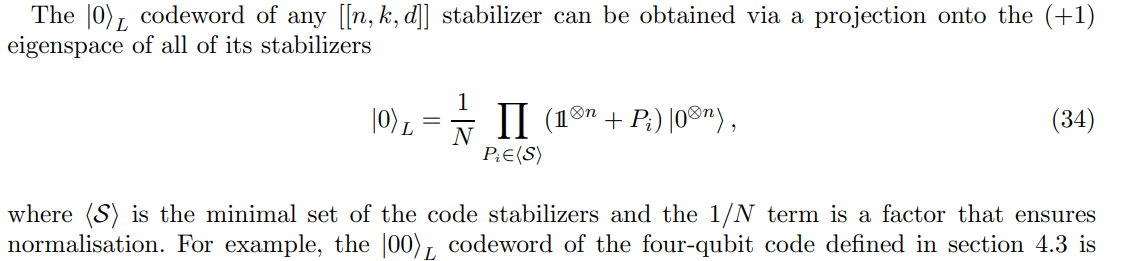

Applying these principles I got the following encoding apprach. The Z projectors do nothing to the |0> state. So, we can neglect them from Eq. (34). Then consider all X-syndromes. In each syndrome find the qubit that does appear in any other syndrome. These unique qubits will be control qubits for CX operators. Before the CX gates you put H operator applied to this unique qubit. This is to create (I + X X X X) oerator. For example, we have syndrome with (0,1,3) qubits involved. Qubit zero is not used in any other syndrome. So, we use it as control. Two other qubits are controlled ones. First we apply H(0).  Then, we put CX(0,1) and CX(0,3). Then we go to the next syndrome and do the same.


## Logical single qubits operations

There are a number of possible choice of logical operators. Bu they should satisfy the following requirements.

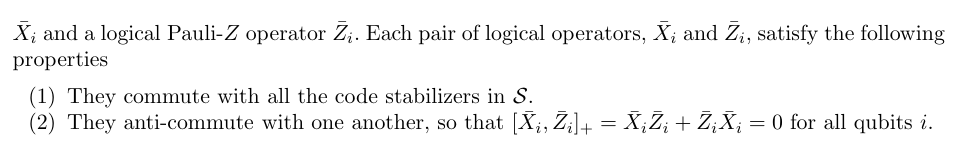

Based on these rule I found by trie and error method:

X_log = X0 X1 X2 X3 X7 X12

Z_log = Z0 Z1 Z2

In [5]:
import stim
import qec_lib
from qec_lib import synd_x, synd_z

In [36]:
#Function creating the logical state encoding block based on the stabilizer state
def log_X(qubits):
    qc = stim.Circuit()
    n_qubits = max(qubits)
    q = range(n_qubits + 1)
    qc.append_operation('X',[q[qubits[0]],q[qubits[1]],q[qubits[2]],q[qubits[3]],q[qubits[7]],q[qubits[12]]])
    return qc

def log_Z(qubits):
    qc = stim.Circuit()
    n_qubits = max(qubits)
    size = len(qubits)
    q = range(n_qubits)
    qc.append_operation('Z',[q[qubits[0]],q[qubits[1]],q[qubits[2]]])
    return qc

 

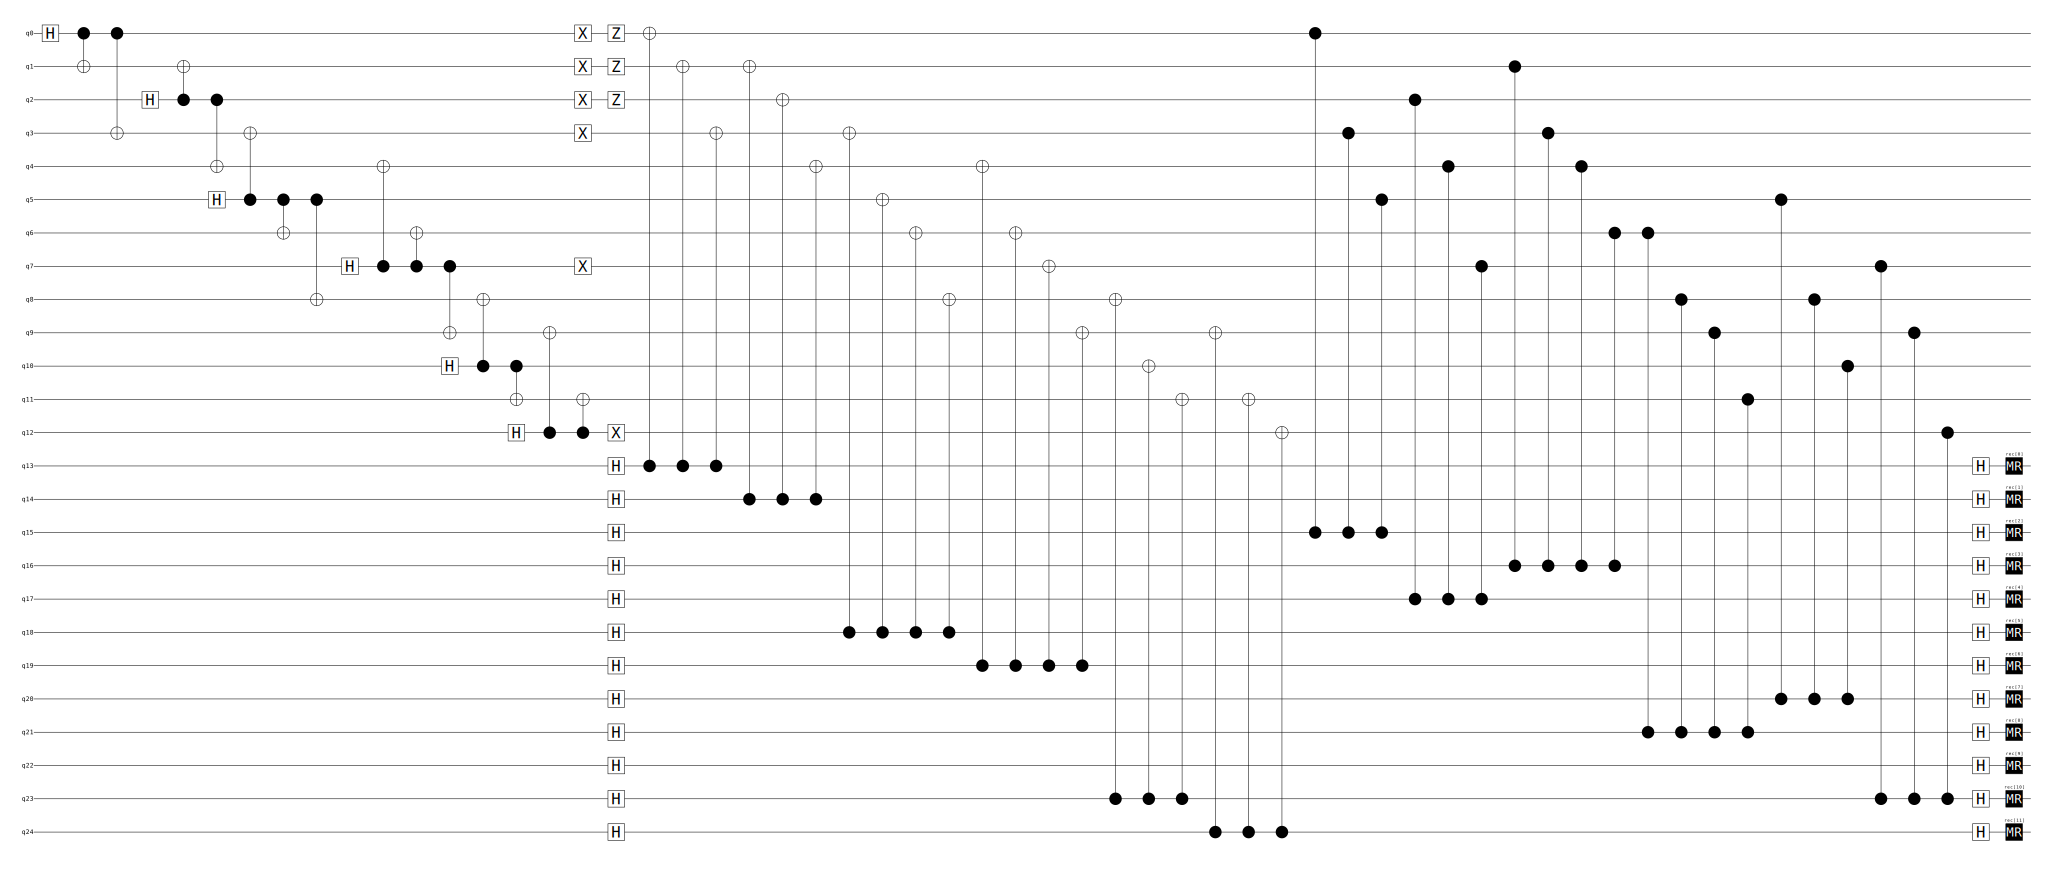

In [42]:
qc_13_1_3 = stim.Circuit()
q_inf = range(13)
q_synd = range(13,25)

#Stabilizer list
#First goes the type of the controlled operator
#Second element of the array is the index of the syndrome extraction qubit
#third to last elemets are the indices of the controlled informational qubits
stab = []
stab.append(['x', 0, 0, 1, 3])
stab.append(['x', 1, 1, 2, 4])
stab.append(['x', 5, 3, 5, 6, 8])
stab.append(['x', 6, 4, 6, 7, 9])
stab.append(['x', 10, 8, 10, 11])
stab.append(['x', 11, 9, 11, 12])
stab.append(['z', 2, 0, 3, 5])
stab.append(['z', 4, 2, 4, 7])
stab.append(['z', 3, 1, 3, 4, 6])
stab.append(['z', 8, 6, 8, 9, 11])
stab.append(['z', 7, 5, 8, 10])
stab.append(['z', 10, 7, 9, 12])

#Encoding a logical state
qc_13_1_3.append_operation('H', q_inf[0])
qc_13_1_3.append_operation('CX', [q_inf[0], q_inf[1]])
qc_13_1_3.append_operation('CX', [q_inf[0], q_inf[3]])

qc_13_1_3.append_operation('H', q_inf[2])
qc_13_1_3.append_operation('CX', [q_inf[2], q_inf[1]])
qc_13_1_3.append_operation('CX', [q_inf[2], q_inf[4]])

qc_13_1_3.append_operation('H', q_inf[5])
qc_13_1_3.append_operation('CX', [q_inf[5], q_inf[3]])
qc_13_1_3.append_operation('CX', [q_inf[5], q_inf[6]])
qc_13_1_3.append_operation('CX', [q_inf[5], q_inf[8]])

qc_13_1_3.append_operation('H', q_inf[7])
qc_13_1_3.append_operation('CX', [q_inf[7], q_inf[4]])
qc_13_1_3.append_operation('CX', [q_inf[7], q_inf[6]])
qc_13_1_3.append_operation('CX', [q_inf[7], q_inf[9]])

qc_13_1_3.append_operation('H', q_inf[10])
qc_13_1_3.append_operation('CX', [q_inf[10], q_inf[8]])
qc_13_1_3.append_operation('CX', [q_inf[10], q_inf[11]])

qc_13_1_3.append_operation('H', q_inf[12])
qc_13_1_3.append_operation('CX', [q_inf[12], q_inf[9]])
qc_13_1_3.append_operation('CX', [q_inf[12], q_inf[11]])

# Apply logical x gate
s1 = log_X(q_inf)
qc_13_1_3 = qc_13_1_3 + s1

# Apply logical z gate
qc_13_1_3 = qc_13_1_3 + log_Z(q_inf)

#Syndrome extraction
qc_13_1_3.append_operation('H',q_synd)
s1 = synd_x([q_inf[0], q_inf[1], q_inf[3], q_synd[0]])
qc_13_1_3 = qc_13_1_3 + s1
s1 = synd_x([q_inf[1], q_inf[2], q_inf[4], q_synd[1]])
qc_13_1_3 = qc_13_1_3 + s1
s1 = synd_x([q_inf[3], q_inf[5], q_inf[6], q_inf[8], q_synd[5]])
qc_13_1_3 = qc_13_1_3 + s1
s1 = synd_x([q_inf[4], q_inf[6], q_inf[7], q_inf[9], q_synd[6]])
qc_13_1_3 = qc_13_1_3 + s1
s1 = synd_x([q_inf[8], q_inf[10], q_inf[11], q_synd[10]])
qc_13_1_3 = qc_13_1_3 + s1
s1 = synd_x([q_inf[9], q_inf[11], q_inf[12], q_synd[11]])
qc_13_1_3 = qc_13_1_3 + s1

s1 = synd_z([q_inf[0], q_inf[3], q_inf[5], q_synd[2]])
qc_13_1_3 = qc_13_1_3 + s1
s1 = synd_z([q_inf[2], q_inf[4], q_inf[7], q_synd[4]])
qc_13_1_3 = qc_13_1_3 + s1
s1 = synd_z([q_inf[1], q_inf[3], q_inf[4], q_inf[6], q_synd[3]])
qc_13_1_3 = qc_13_1_3 + s1
s1 = synd_z([q_inf[6], q_inf[8], q_inf[9], q_inf[11], q_synd[8]])
qc_13_1_3 = qc_13_1_3 + s1
s1 = synd_z([q_inf[5], q_inf[8], q_inf[10], q_synd[7]])
qc_13_1_3 = qc_13_1_3 + s1
s1 = synd_z([q_inf[7], q_inf[9], q_inf[12], q_synd[10]])
qc_13_1_3 = qc_13_1_3 + s1
qc_13_1_3.append_operation('H',q_synd)

qc_13_1_3.append_operation('MR', q_synd)

qc_13_1_3.diagram('timeline-svg')

In [43]:
res = qc_13_1_3.compile_sampler().sample(1)
res

array([[False, False, False, False, False, False, False, False, False,
        False, False, False]])